In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%cd ..

c:\Users\troosma\Documents\Ylikool\6. semester\Bakatöö\bakatoo


In [2]:
import sys
import os

import numpy as np
import pandas as pd
import random
import tensorflow as tf

from tensorflow import keras
from keras import layers

from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns

from scripts.CustomCallbacks import CustomLogger
import scripts.utils as utils
import scripts.Slopes as Slopes

from tqdm import tqdm
import json
utils.reset_seeds(0)


In [3]:
pd.set_option('display.max_columns', 50)

In [7]:
#df = pd.read_csv("andmed/order2_const.csv")
df = pd.read_csv("andmed/reverse2_const.csv")

In [8]:
### tagurpidi noise
df.train_size = df.train_size.astype(int)
df.random_seed = df.random_seed.astype(int)
df.multiplier = df.multiplier.astype(float)
for i in range(5):
    df[f"ext_bpoints_in_{chr(i+ord('a'))}"] = df[f"ext_bpoints_in_{chr(i+ord('a'))}"].astype(int)

# lisame mugavusväärtused
df["points_in_equal_regions"] = (df["train_size"] / 5).astype(int)
df["points_in_diff_region"] =  (df["points_in_equal_regions"] * df["multiplier"]).astype(int)
df["total_points"] = 4*df["points_in_equal_regions"] + df["points_in_diff_region"]

# tuunime välja väga kauged sampled
df = df[df.abs_diff_in_a < 100]


In [9]:
df.sort_values(by=["train_size", "region", "multiplier", "random_seed"], inplace=True, ignore_index=True)
df = df.groupby(['region', 'multiplier', 'train_size']).mean().reset_index()

df["combo_name"] = df["train_size"].astype(str) + "_" + df["region"] + "_" + df["multiplier"].astype(str)

<AxesSubplot: >

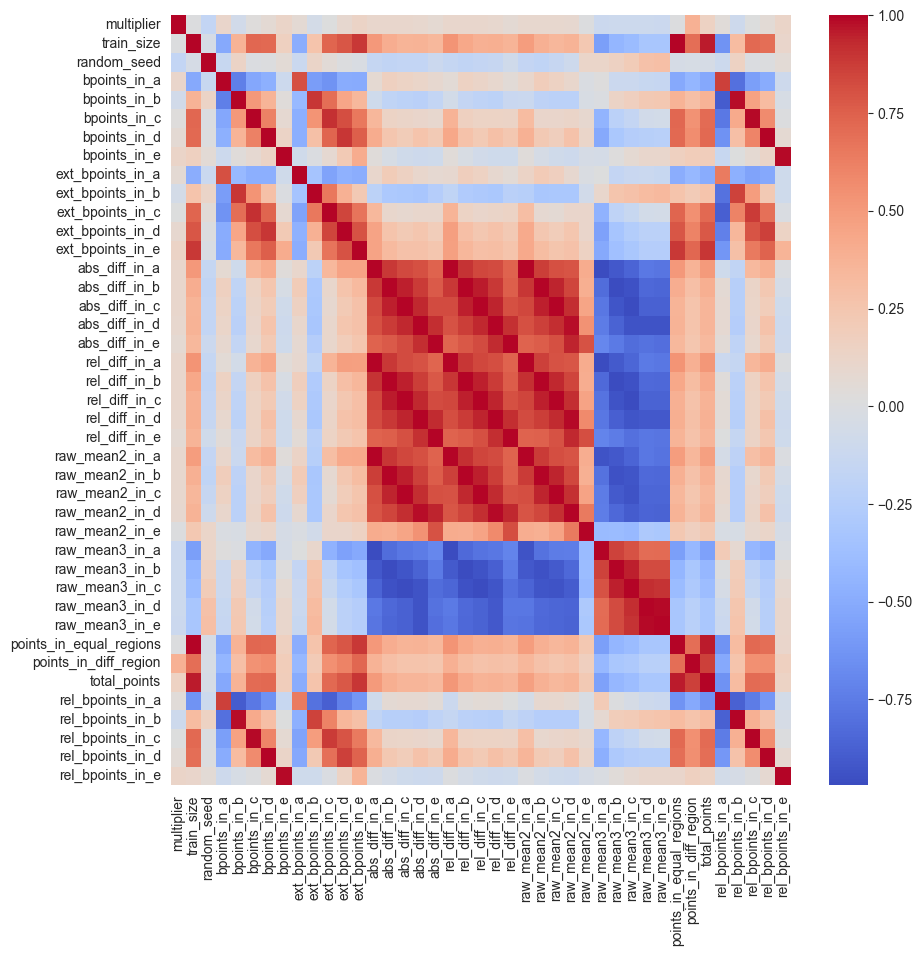

In [230]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm")

<AxesSubplot: >

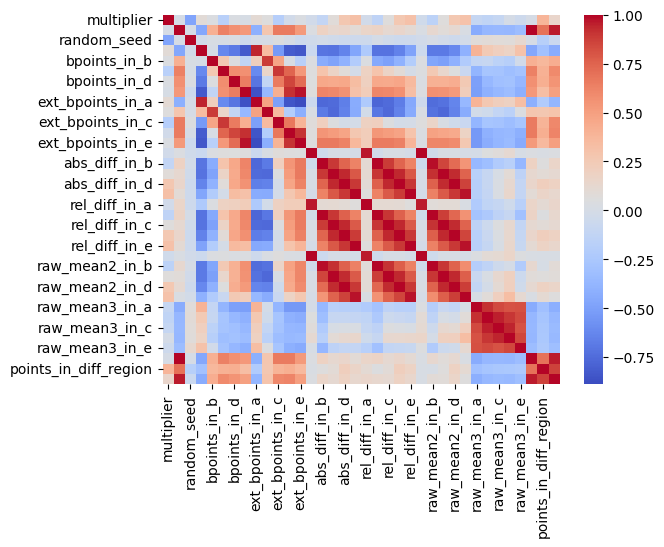

In [67]:
sns.heatmap(df_reverse.corr(numeric_only=True), cmap="coolwarm")

## Joonistame 

In [11]:
sns.set_style("whitegrid")

<AxesSubplot: xlabel='points_in_equal_regions', ylabel='bpoints_in_a'>

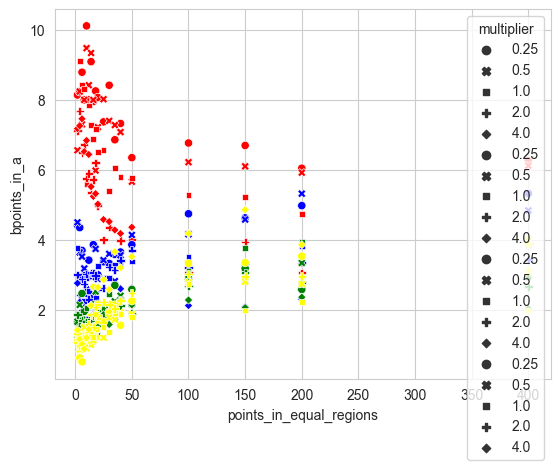

In [12]:
test_df = df[df.region=="E"]
sns.scatterplot(data = test_df, x="points_in_equal_regions",y="bpoints_in_a",color="red", style="multiplier")
sns.scatterplot(data = test_df, x="points_in_equal_regions",y="bpoints_in_b",color="blue", style="multiplier")
sns.scatterplot(data = test_df, x="points_in_equal_regions",y="bpoints_in_c",color="green", style="multiplier")
sns.scatterplot(data = test_df, x="points_in_equal_regions",y="bpoints_in_d",color="yellow", style="multiplier")

<AxesSubplot: xlabel='points_in_diff_region', ylabel='rel_diff_in_c'>

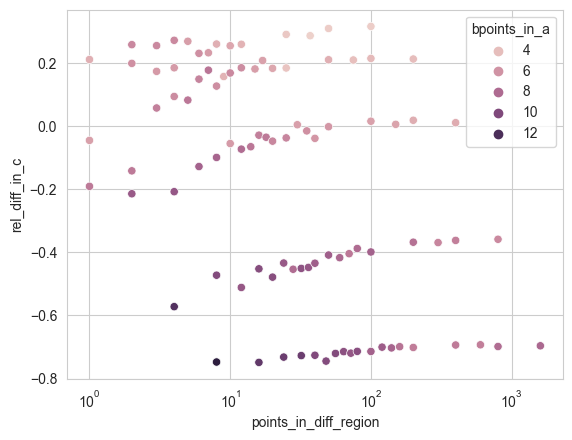

In [13]:
test_df = df[(df.region=="A")&(df.points_in_diff_region!=0)]
fig, ax = plt.subplots()
ax.set_xscale( "log")
#sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_a",hue="bpoints_in_a",ax=ax)#hue_norm=LogNorm() )
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_c",hue="bpoints_in_a",)#ax=ax)#hue_norm=LogNorm() )
# sns.scatterplot(data = test_df, x="bpoints_in_",y="rel_diff_in_b",hue="multiplier")
# sns.scatterplot(data = test_df, x="bpoints_in_",y="rel_diff_in_c",hue="multiplier")
# sns.scatterplot(data = test_df, x="bpoints_in_",y="rel_diff_in_d",hue="multiplier")
# sns.scatterplot(data = test_df, x="bpoints_in_",y="rel_diff_in_e",hue="multiplier")

In [14]:
test_df.corr(numeric_only=True).shape

(36, 36)

<AxesSubplot: >

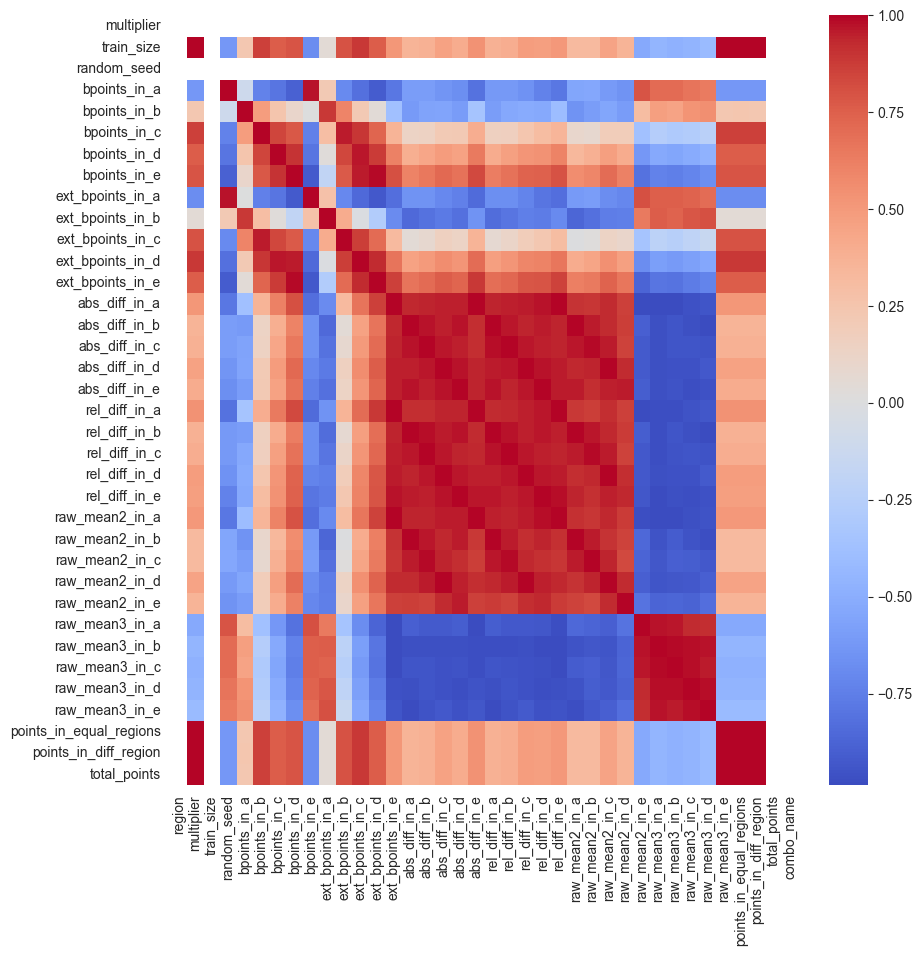

In [15]:
test_df = df[(df.region == "A") & (
    df.points_in_diff_region != 0) & (df.multiplier == 0.5)]
plt.figure(figsize=(10, 10))
sns.heatmap(test_df.corr(numeric_only=True), cmap="coolwarm",
            xticklabels=test_df.columns, yticklabels=1,)


## pts_diff_reg vs rel_diff_in_
multiplieriga välja filtreerimine ei muuda väga midagist.

### region A 

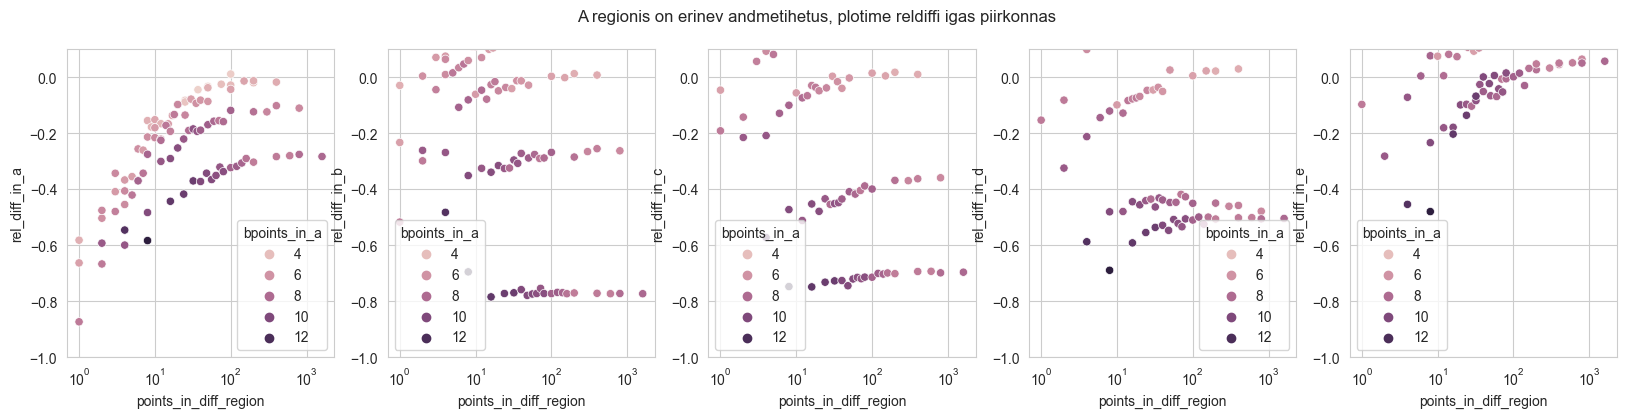

In [16]:
test_df = df[(df.region=="A")&(df.points_in_diff_region!=0)] #&(df.multiplier==2)
fig, ax = plt.subplots(1,5, figsize=(20, 4))

[a.set_xscale( "log") for a in ax]
[a.set_ylim(-1, 0.1) for a in ax]
# plt.legend(loc='lower right')
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_a",hue="bpoints_in_a" ,ax=ax[0])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_b",hue="bpoints_in_a", ax=ax[1])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_c",hue="bpoints_in_a", ax=ax[2])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_d",hue="bpoints_in_a", ax=ax[3])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_e",hue="bpoints_in_a", ax=ax[4])
plt.suptitle("A regionis on erinev andmetihetus, plotime reldiffi igas piirkonnas")
plt.show()

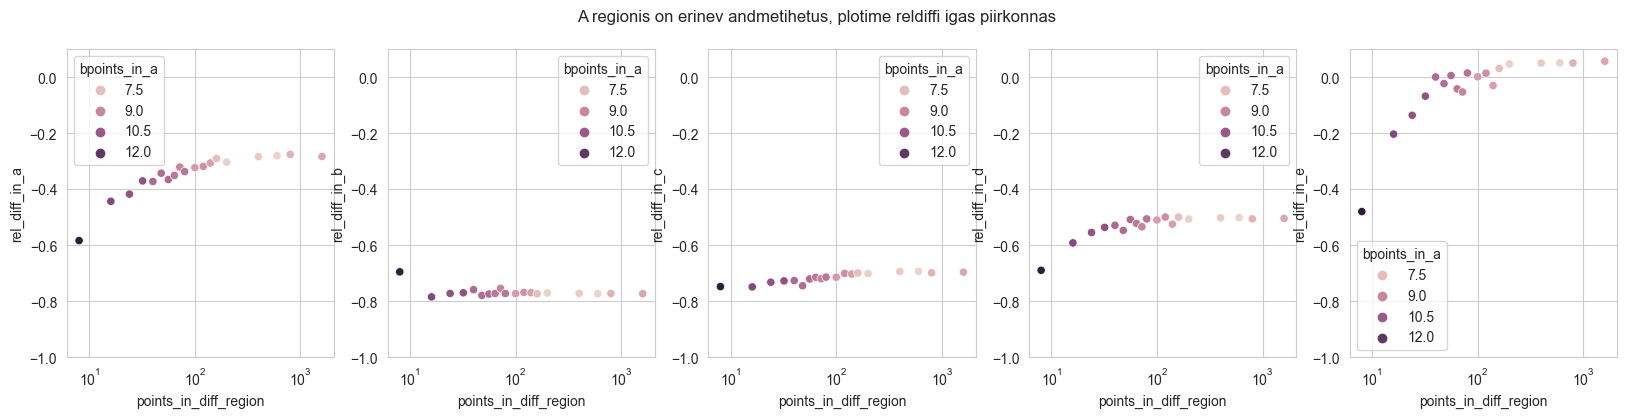

In [17]:
test_df = df[(df.region=="A")&(df.points_in_diff_region!=0) &(df.multiplier==4)]
fig, ax = plt.subplots(1,5, figsize=(20, 4))

[a.set_xscale( "log") for a in ax]
[a.set_ylim(-1, 0.1) for a in ax]
# plt.legend(loc='lower right')
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_a",hue="bpoints_in_a" ,ax=ax[0])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_b",hue="bpoints_in_a", ax=ax[1])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_c",hue="bpoints_in_a", ax=ax[2])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_d",hue="bpoints_in_a", ax=ax[3])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_e",hue="bpoints_in_a", ax=ax[4])
plt.suptitle("A regionis on erinev andmetihetus, plotime reldiffi igas piirkonnas")
plt.show()

### region B
- bpoints_a : natukene: rohkem bpoint -> halvem rel_dif
- bpoints_b on mida rohkem andmeid, seda rohkem bpointe?
- bpoints_c on rohkem bpoint-> parem rel_diff
- bpoints_d : rohkem bpoint-> parem rel_diff
- bpoints_e : suvaline

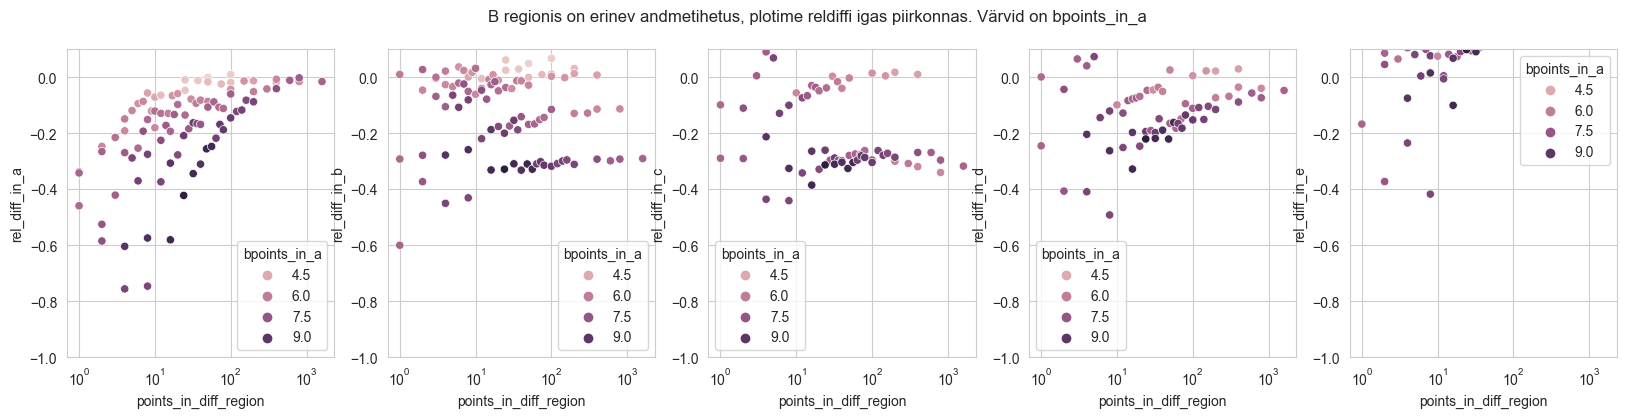

In [18]:
test_df = df[(df.region=="B")&(df.points_in_diff_region!=0)]
fig, ax = plt.subplots(1,5, figsize=(20, 4))

[a.set_xscale( "log") for a in ax]
[a.set_ylim(-1, 0.1) for a in ax]
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_a",hue="bpoints_in_a" ,ax=ax[0])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_b",hue="bpoints_in_a", ax=ax[1])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_c",hue="bpoints_in_a", ax=ax[2])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_d",hue="bpoints_in_a", ax=ax[3])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_e",hue="bpoints_in_a", ax=ax[4])
plt.suptitle("B regionis on erinev andmetihetus, plotime reldiffi igas piirkonnas. Värvid on bpoints_in_a")
plt.show()

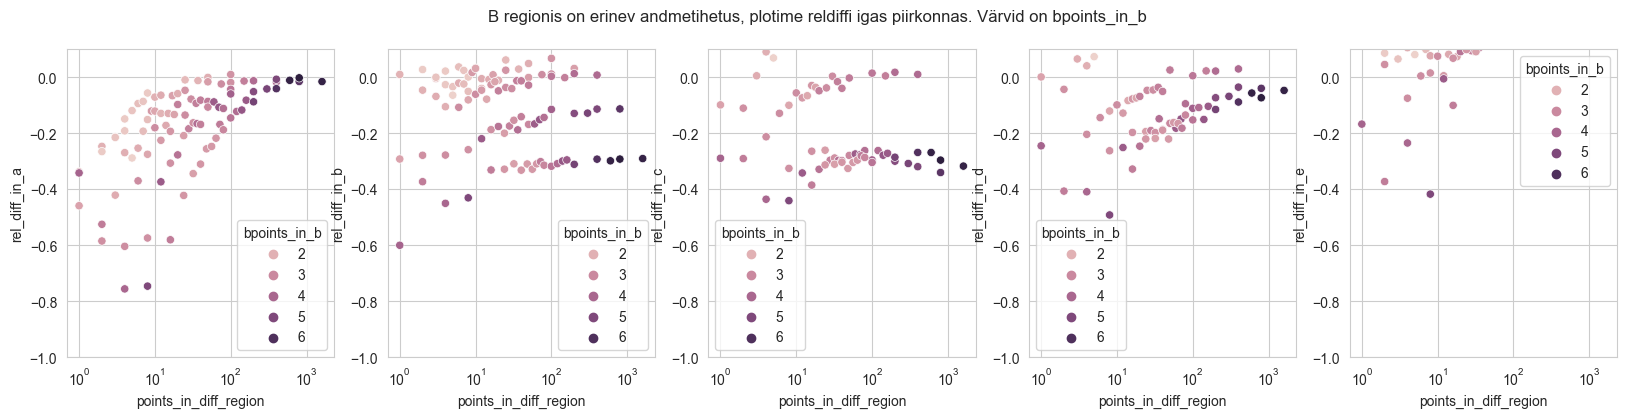

In [19]:
test_df = df[(df.region=="B")&(df.points_in_diff_region!=0)]
fig, ax = plt.subplots(1,5, figsize=(20, 4))

[a.set_xscale( "log") for a in ax]
[a.set_ylim(-1, 0.1) for a in ax]
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_a",hue="bpoints_in_b" ,ax=ax[0])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_b",hue="bpoints_in_b", ax=ax[1])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_c",hue="bpoints_in_b", ax=ax[2])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_d",hue="bpoints_in_b", ax=ax[3])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_e",hue="bpoints_in_b", ax=ax[4])
plt.suptitle("B regionis on erinev andmetihetus, plotime reldiffi igas piirkonnas. Värvid on bpoints_in_b")
plt.show()

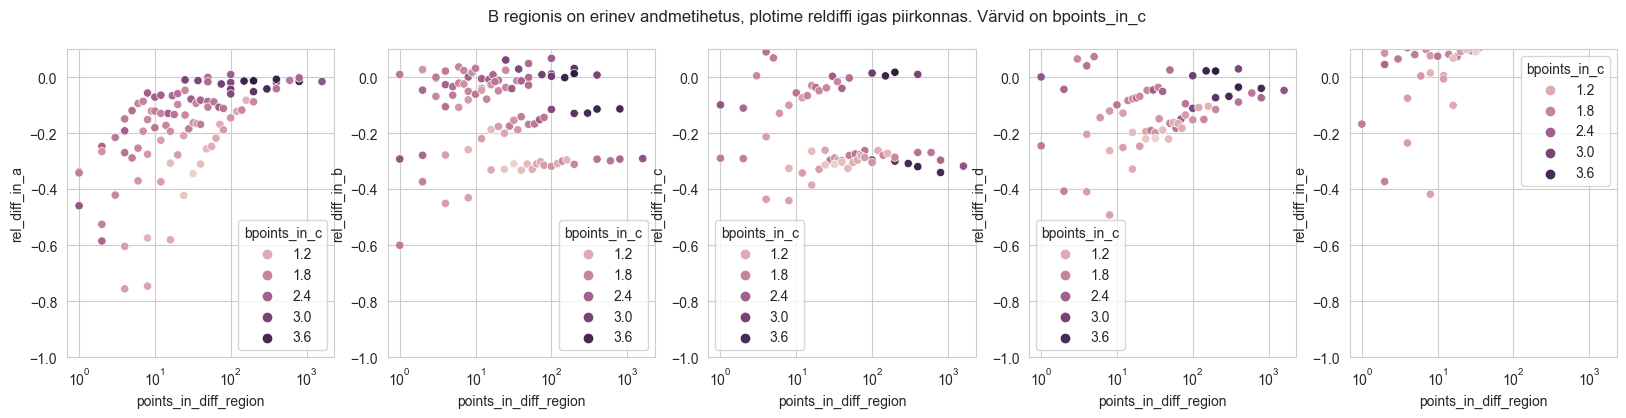

In [20]:
test_df = df[(df.region=="B")&(df.points_in_diff_region!=0)]
fig, ax = plt.subplots(1,5, figsize=(20, 4))

[a.set_xscale( "log") for a in ax]
[a.set_ylim(-1, 0.1) for a in ax]
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_a",hue="bpoints_in_c" ,ax=ax[0])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_b",hue="bpoints_in_c", ax=ax[1])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_c",hue="bpoints_in_c", ax=ax[2])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_d",hue="bpoints_in_c", ax=ax[3])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_e",hue="bpoints_in_c", ax=ax[4])
plt.suptitle("B regionis on erinev andmetihetus, plotime reldiffi igas piirkonnas. Värvid on bpoints_in_c")
plt.show()

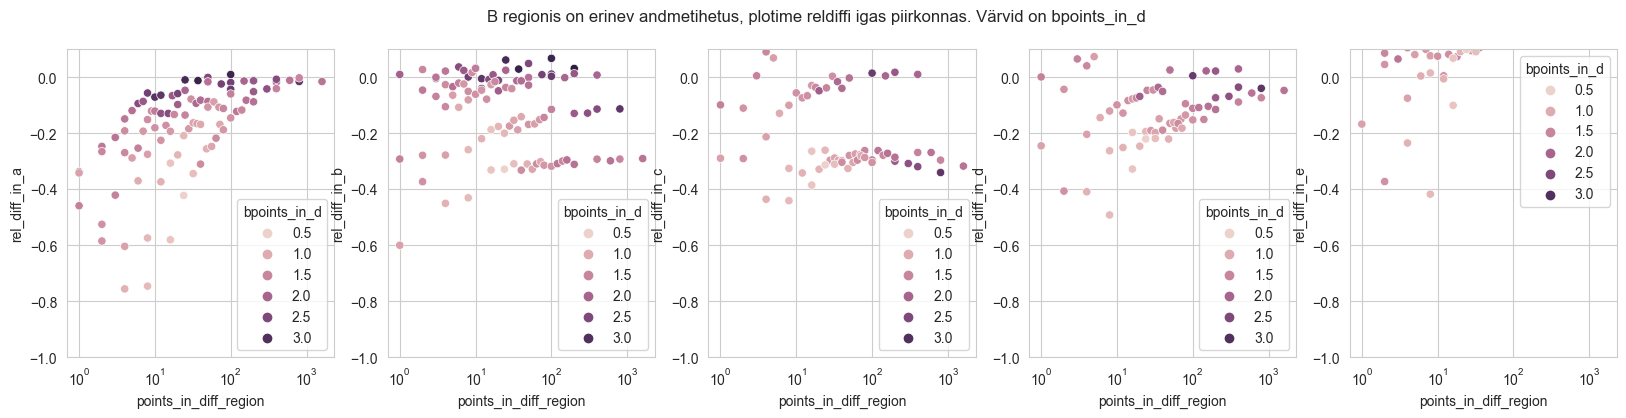

In [21]:
test_df = df[(df.region=="B")&(df.points_in_diff_region!=0)]
fig, ax = plt.subplots(1,5, figsize=(20, 4))

[a.set_xscale( "log") for a in ax]
[a.set_ylim(-1, 0.1) for a in ax]
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_a",hue="bpoints_in_d" ,ax=ax[0])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_b",hue="bpoints_in_d", ax=ax[1])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_c",hue="bpoints_in_d", ax=ax[2])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_d",hue="bpoints_in_d", ax=ax[3])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_e",hue="bpoints_in_d", ax=ax[4])
plt.suptitle("B regionis on erinev andmetihetus, plotime reldiffi igas piirkonnas. Värvid on bpoints_in_d")
plt.show()

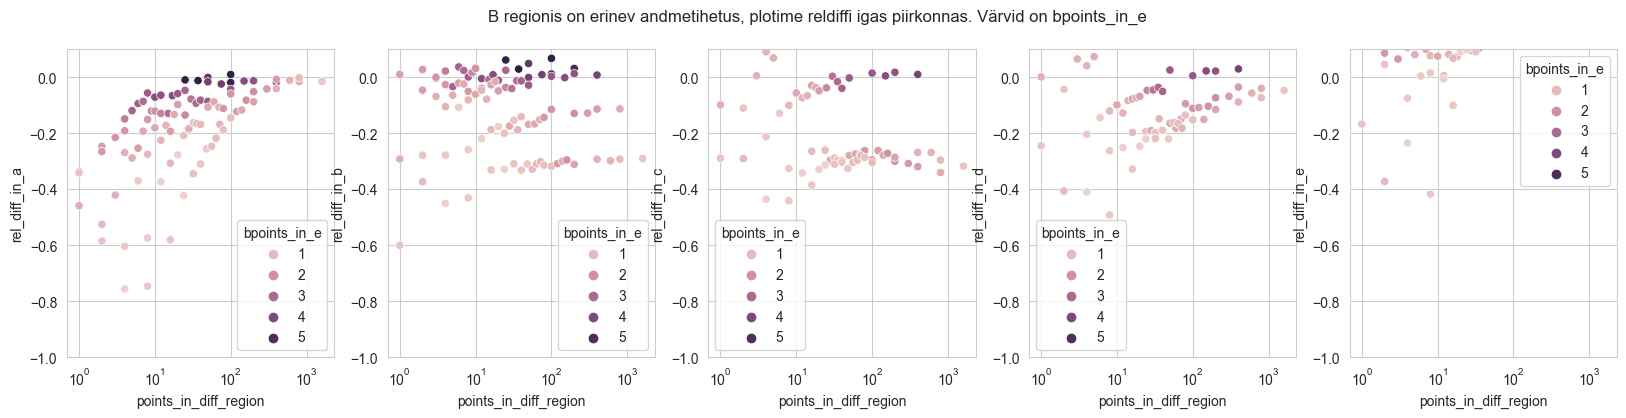

In [22]:
test_df = df[(df.region=="B")&(df.points_in_diff_region!=0)]
fig, ax = plt.subplots(1,5, figsize=(20, 4))

[a.set_xscale( "log") for a in ax]
[a.set_ylim(-1, 0.1) for a in ax]
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_a",hue="bpoints_in_e" ,ax=ax[0])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_b",hue="bpoints_in_e", ax=ax[1])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_c",hue="bpoints_in_e", ax=ax[2])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_d",hue="bpoints_in_e", ax=ax[3])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_e",hue="bpoints_in_e", ax=ax[4])
plt.suptitle("B regionis on erinev andmetihetus, plotime reldiffi igas piirkonnas. Värvid on bpoints_in_e")
plt.show()

### region C
- bpoints_a : natukene : vähem bpointe parem
- bpoints_b : keskmine kogus bpointe on parem
- bpoints_c : rohkem bpointe on parem
- bpoints_d : rohkem bpointe on parem
- bpoints_e : suvaline 

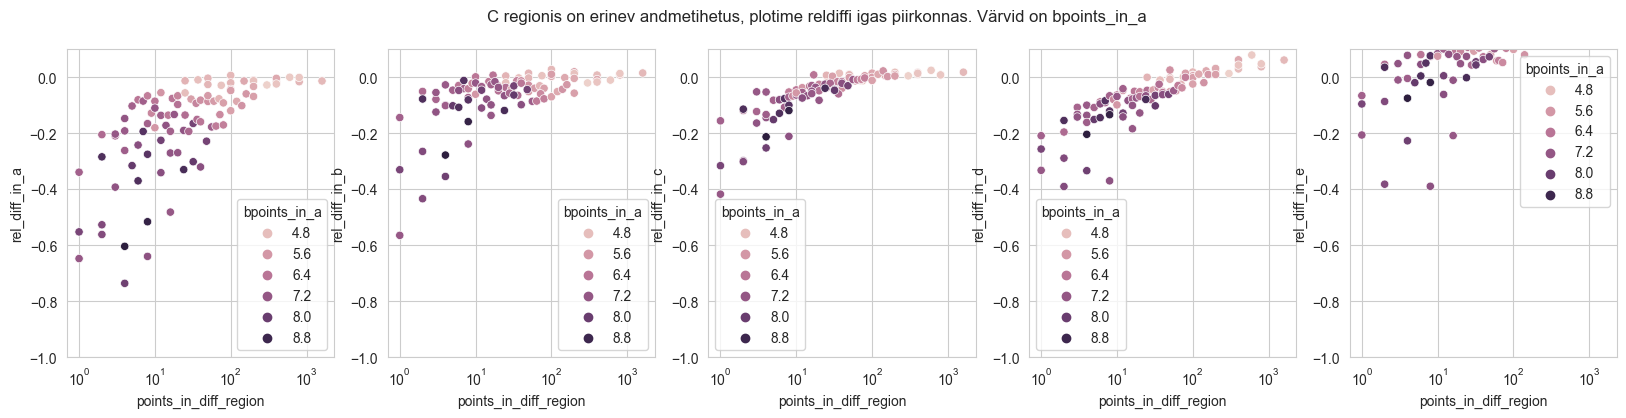

In [23]:
test_df = df[(df.region=="C")&(df.points_in_diff_region!=0)]
fig, ax = plt.subplots(1,5, figsize=(20, 4))

[a.set_xscale( "log") for a in ax]
[a.set_ylim(-1, 0.1) for a in ax]
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_a",hue="bpoints_in_a" ,ax=ax[0])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_b",hue="bpoints_in_a", ax=ax[1])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_c",hue="bpoints_in_a", ax=ax[2])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_d",hue="bpoints_in_a", ax=ax[3])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_e",hue="bpoints_in_a", ax=ax[4])
plt.suptitle("C regionis on erinev andmetihetus, plotime reldiffi igas piirkonnas. Värvid on bpoints_in_a")
plt.show()

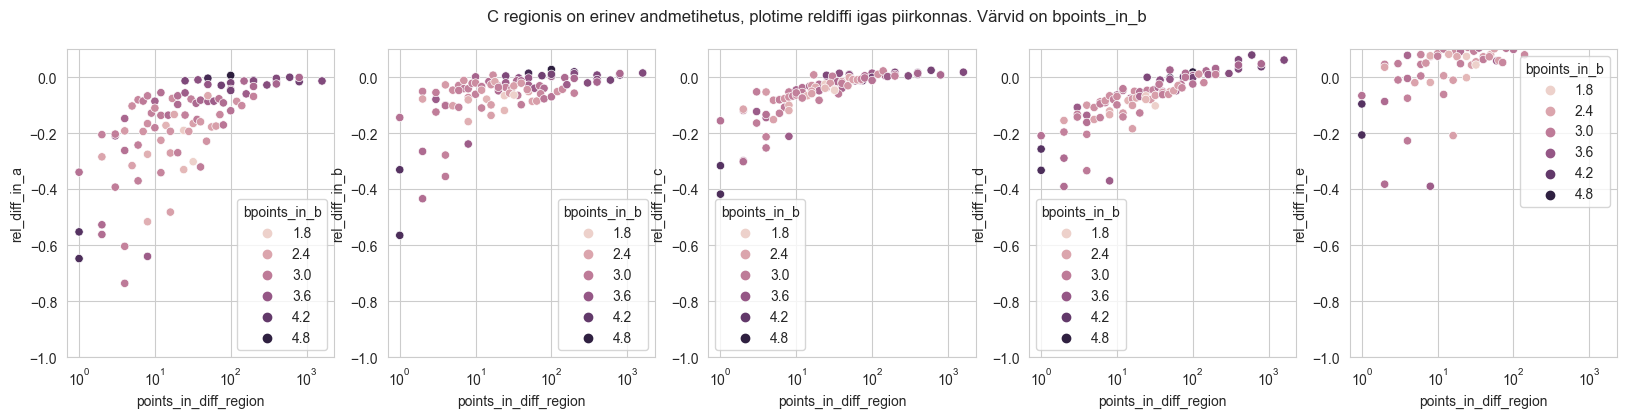

In [24]:
test_df = df[(df.region=="C")&(df.points_in_diff_region!=0)]
fig, ax = plt.subplots(1,5, figsize=(20, 4))

[a.set_xscale( "log") for a in ax]
[a.set_ylim(-1, 0.1) for a in ax]
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_a",hue="bpoints_in_b" ,ax=ax[0])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_b",hue="bpoints_in_b", ax=ax[1])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_c",hue="bpoints_in_b", ax=ax[2])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_d",hue="bpoints_in_b", ax=ax[3])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_e",hue="bpoints_in_b", ax=ax[4])
plt.suptitle("C regionis on erinev andmetihetus, plotime reldiffi igas piirkonnas. Värvid on bpoints_in_b")
plt.show()

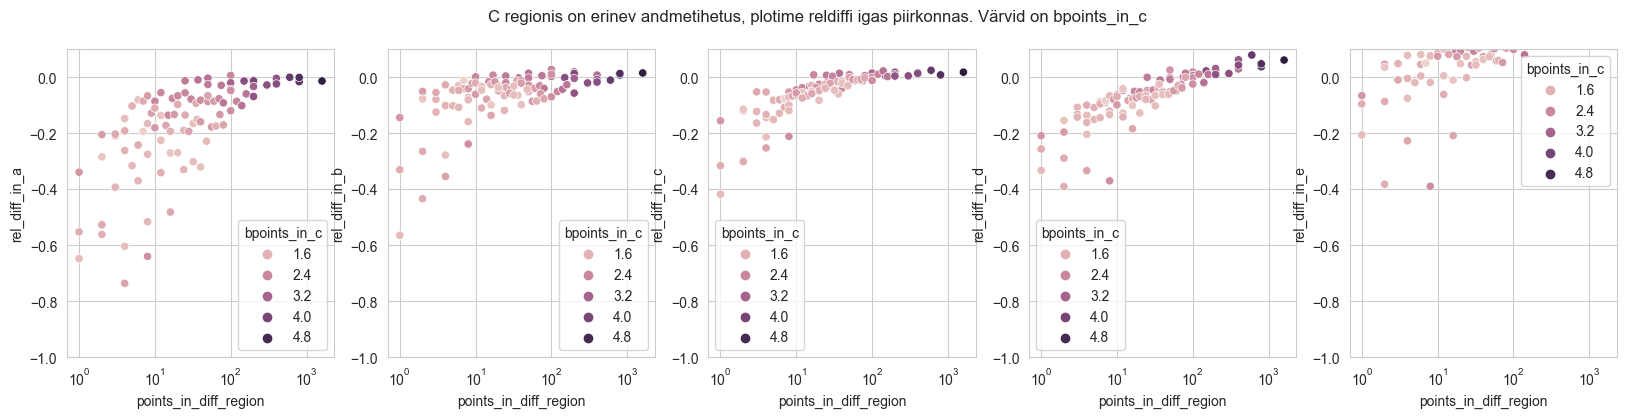

In [25]:
test_df = df[(df.region=="C")&(df.points_in_diff_region!=0)]
fig, ax = plt.subplots(1,5, figsize=(20, 4))

[a.set_xscale( "log") for a in ax]
[a.set_ylim(-1, 0.1) for a in ax]
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_a",hue="bpoints_in_c" ,ax=ax[0])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_b",hue="bpoints_in_c", ax=ax[1])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_c",hue="bpoints_in_c", ax=ax[2])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_d",hue="bpoints_in_c", ax=ax[3])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_e",hue="bpoints_in_c", ax=ax[4])
plt.suptitle("C regionis on erinev andmetihetus, plotime reldiffi igas piirkonnas. Värvid on bpoints_in_c")
plt.show()

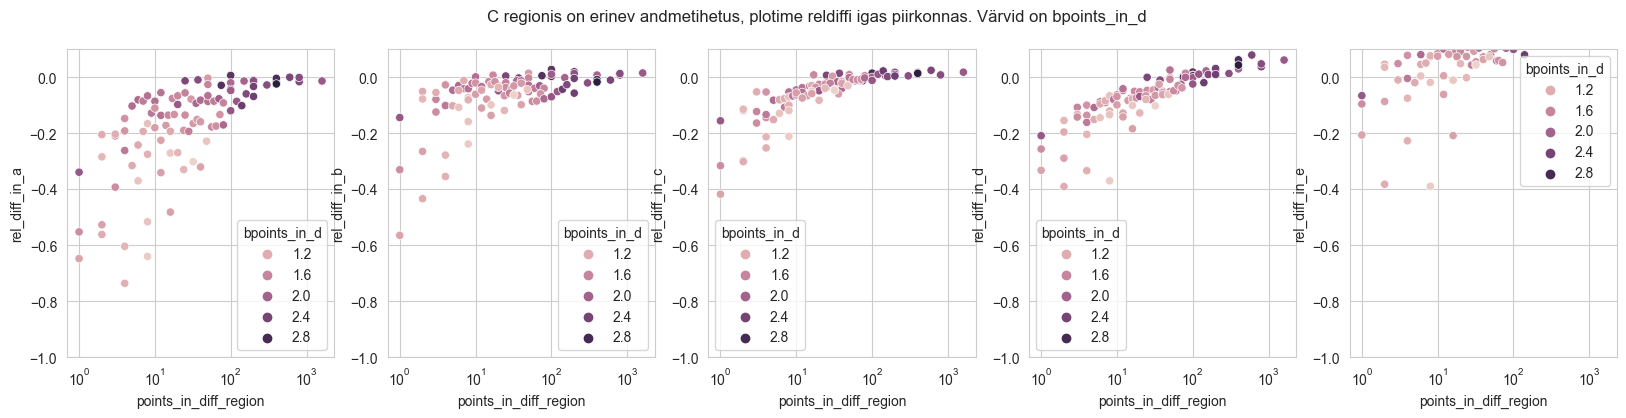

In [26]:
test_df = df[(df.region=="C")&(df.points_in_diff_region!=0)]
fig, ax = plt.subplots(1,5, figsize=(20, 4))

[a.set_xscale( "log") for a in ax]
[a.set_ylim(-1, 0.1) for a in ax]
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_a",hue="bpoints_in_d" ,ax=ax[0])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_b",hue="bpoints_in_d", ax=ax[1])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_c",hue="bpoints_in_d", ax=ax[2])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_d",hue="bpoints_in_d", ax=ax[3])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_e",hue="bpoints_in_d", ax=ax[4])
plt.suptitle("C regionis on erinev andmetihetus, plotime reldiffi igas piirkonnas. Värvid on bpoints_in_d")
plt.show()

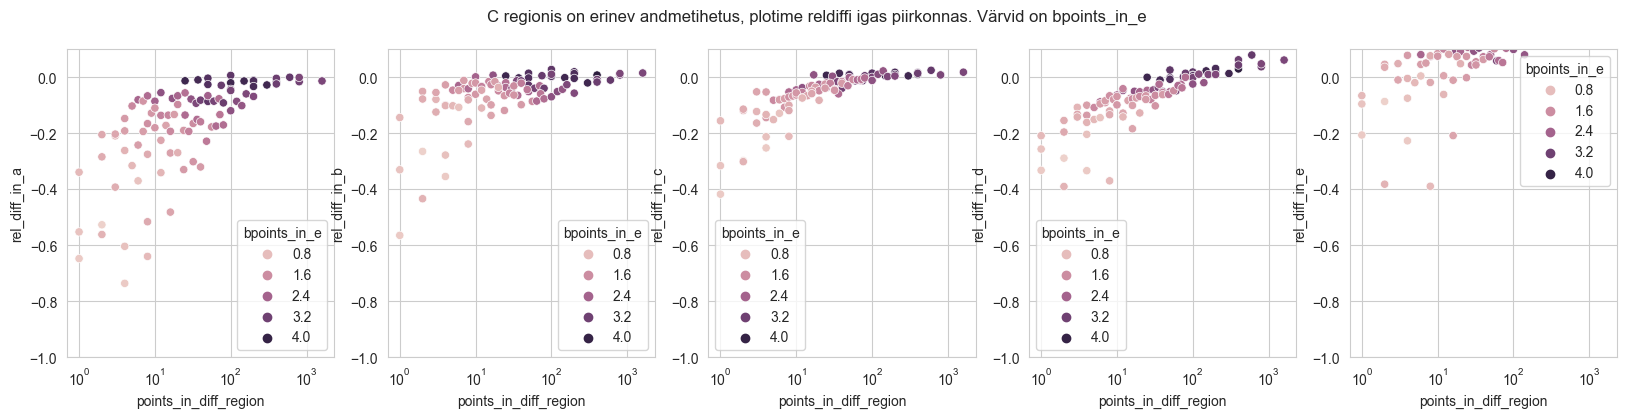

In [27]:
test_df = df[(df.region=="C")&(df.points_in_diff_region!=0)]
fig, ax = plt.subplots(1,5, figsize=(20, 4))

[a.set_xscale( "log") for a in ax]
[a.set_ylim(-1, 0.1) for a in ax]
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_a",hue="bpoints_in_e" ,ax=ax[0])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_b",hue="bpoints_in_e", ax=ax[1])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_c",hue="bpoints_in_e", ax=ax[2])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_d",hue="bpoints_in_e", ax=ax[3])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_e",hue="bpoints_in_e", ax=ax[4])
plt.suptitle("C regionis on erinev andmetihetus, plotime reldiffi igas piirkonnas. Värvid on bpoints_in_e")
plt.show()

### region E
- 

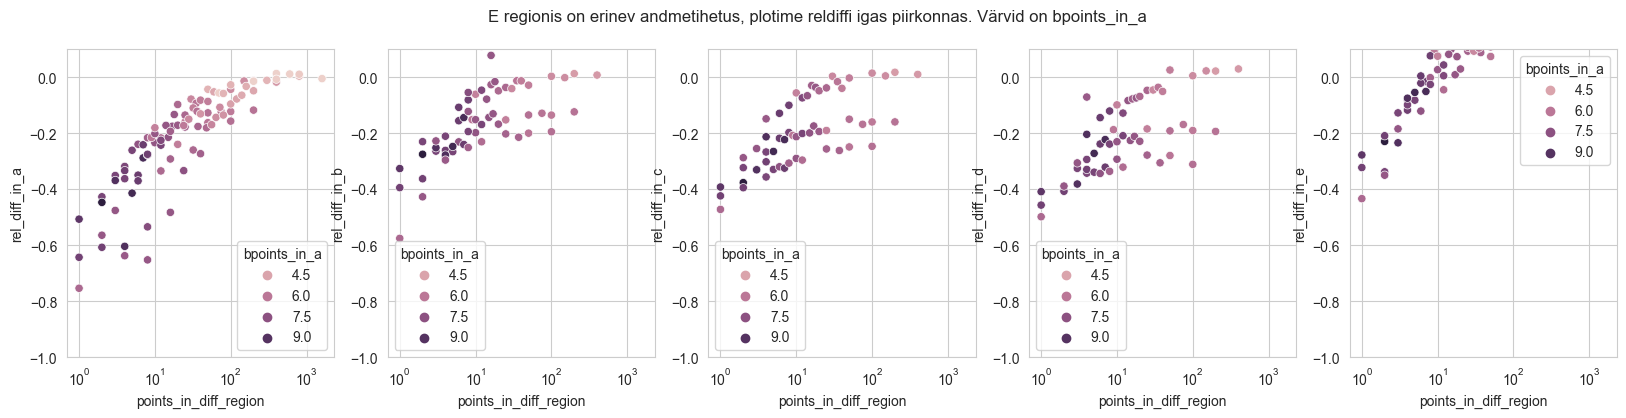

In [28]:
test_df = df[(df.region=="E")&(df.points_in_diff_region!=0)]
fig, ax = plt.subplots(1,5, figsize=(20, 4))

[a.set_xscale( "log") for a in ax]
[a.set_ylim(-1, 0.1) for a in ax]
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_a",hue="bpoints_in_a" ,ax=ax[0])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_b",hue="bpoints_in_a", ax=ax[1])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_c",hue="bpoints_in_a", ax=ax[2])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_d",hue="bpoints_in_a", ax=ax[3])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_e",hue="bpoints_in_a", ax=ax[4])
plt.suptitle("E regionis on erinev andmetihetus, plotime reldiffi igas piirkonnas. Värvid on bpoints_in_a")
plt.show()

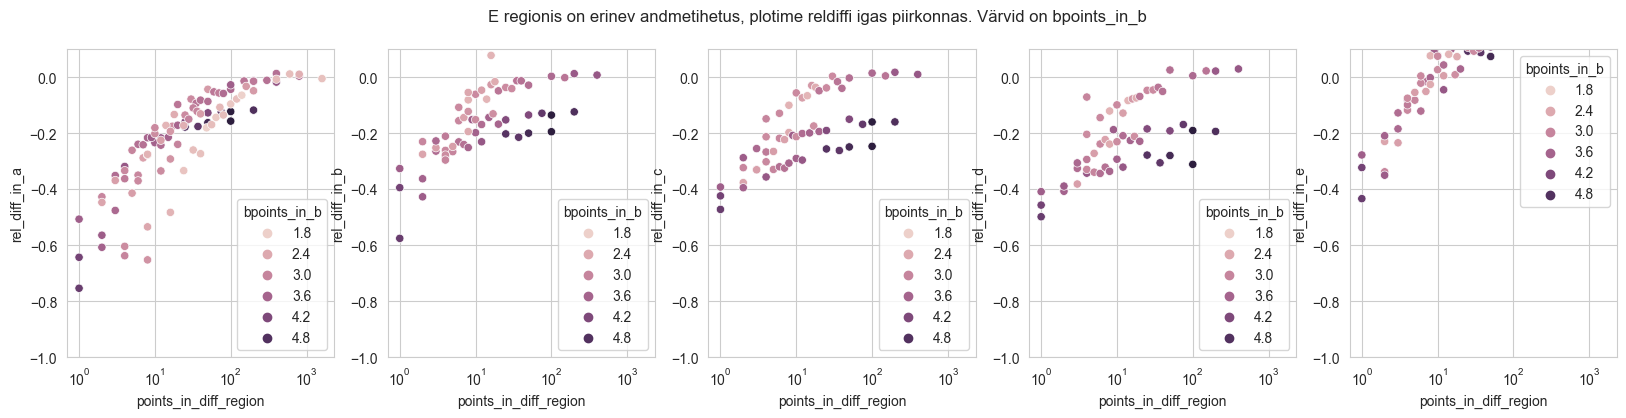

In [29]:
test_df = df[(df.region=="E")&(df.points_in_diff_region!=0)]
fig, ax = plt.subplots(1,5, figsize=(20, 4))

[a.set_xscale( "log") for a in ax]
[a.set_ylim(-1, 0.1) for a in ax]
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_a",hue="bpoints_in_b" ,ax=ax[0])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_b",hue="bpoints_in_b", ax=ax[1])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_c",hue="bpoints_in_b", ax=ax[2])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_d",hue="bpoints_in_b", ax=ax[3])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_e",hue="bpoints_in_b", ax=ax[4])
plt.suptitle("E regionis on erinev andmetihetus, plotime reldiffi igas piirkonnas. Värvid on bpoints_in_b")
plt.show()

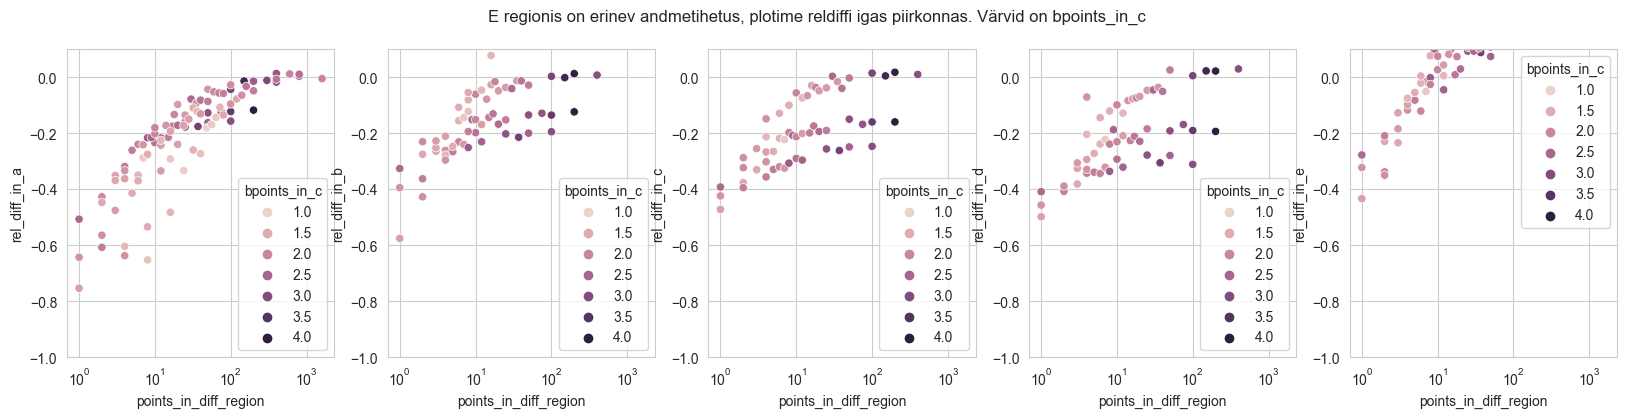

In [30]:
test_df = df[(df.region=="E")&(df.points_in_diff_region!=0)]
fig, ax = plt.subplots(1,5, figsize=(20, 4))

[a.set_xscale( "log") for a in ax]
[a.set_ylim(-1, 0.1) for a in ax]
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_a",hue="bpoints_in_c" ,ax=ax[0])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_b",hue="bpoints_in_c", ax=ax[1])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_c",hue="bpoints_in_c", ax=ax[2])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_d",hue="bpoints_in_c", ax=ax[3])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_e",hue="bpoints_in_c", ax=ax[4])
plt.suptitle("E regionis on erinev andmetihetus, plotime reldiffi igas piirkonnas. Värvid on bpoints_in_c")
plt.show()

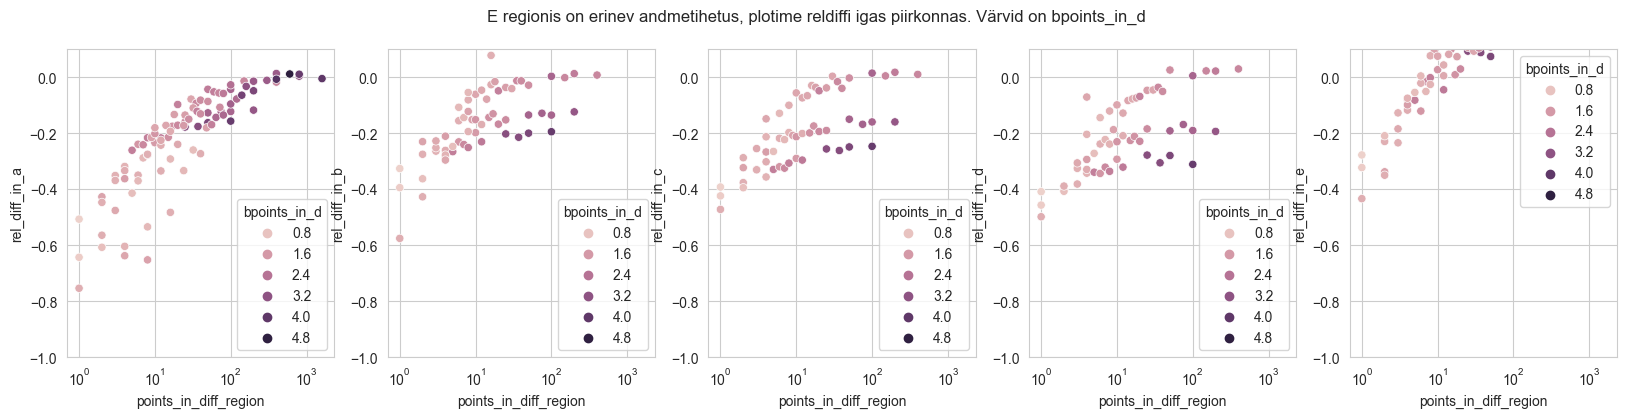

In [31]:
test_df = df[(df.region=="E")&(df.points_in_diff_region!=0)]
fig, ax = plt.subplots(1,5, figsize=(20, 4))

[a.set_xscale( "log") for a in ax]
[a.set_ylim(-1, 0.1) for a in ax]
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_a",hue="bpoints_in_d" ,ax=ax[0])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_b",hue="bpoints_in_d", ax=ax[1])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_c",hue="bpoints_in_d", ax=ax[2])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_d",hue="bpoints_in_d", ax=ax[3])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_e",hue="bpoints_in_d", ax=ax[4])
plt.suptitle("E regionis on erinev andmetihetus, plotime reldiffi igas piirkonnas. Värvid on bpoints_in_d")
plt.show()

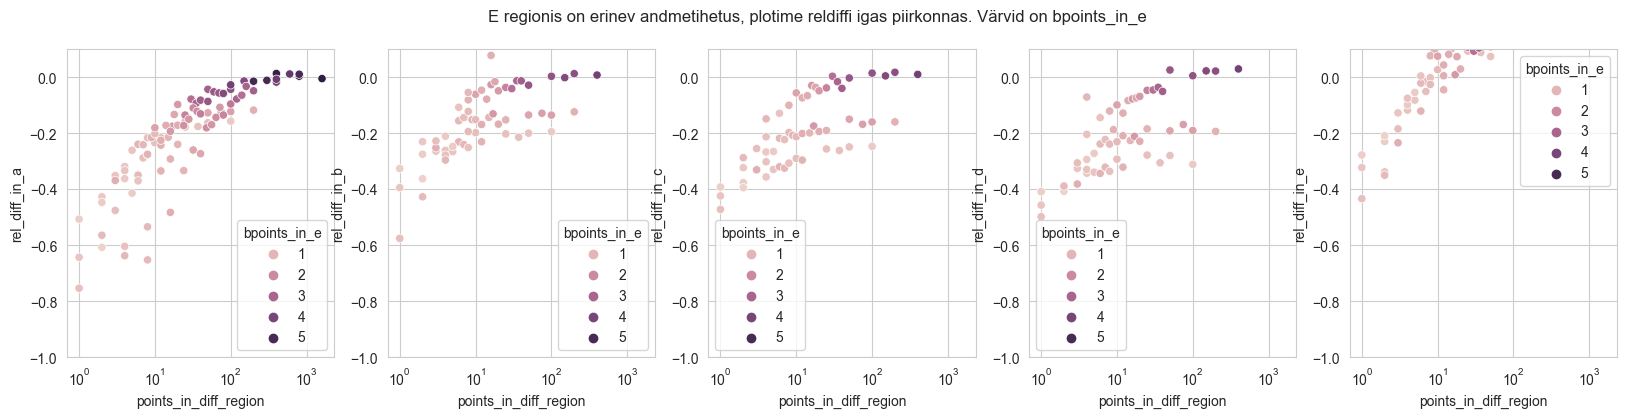

In [32]:
test_df = df[(df.region=="E")&(df.points_in_diff_region!=0)]
fig, ax = plt.subplots(1,5, figsize=(20, 4))

[a.set_xscale( "log") for a in ax]
[a.set_ylim(-1, 0.1) for a in ax]
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_a",hue="bpoints_in_e" ,ax=ax[0])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_b",hue="bpoints_in_e", ax=ax[1])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_c",hue="bpoints_in_e", ax=ax[2])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_d",hue="bpoints_in_e", ax=ax[3])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_e",hue="bpoints_in_e", ax=ax[4])
plt.suptitle("E regionis on erinev andmetihetus, plotime reldiffi igas piirkonnas. Värvid on bpoints_in_e")
plt.show()

## Protsent kogu mudeli bpointidest vastavas piirkonnas

In [33]:
df["rel_bpoints_in_a"] = df["bpoints_in_a"]/ (df["bpoints_in_a"]+df["bpoints_in_b"]+df["bpoints_in_c"]+df["bpoints_in_d"]+df["bpoints_in_e"])
df["rel_bpoints_in_b"] = df["bpoints_in_b"]/ (df["bpoints_in_a"]+df["bpoints_in_b"]+df["bpoints_in_c"]+df["bpoints_in_d"]+df["bpoints_in_e"])
df["rel_bpoints_in_c"] = df["bpoints_in_c"]/ (df["bpoints_in_a"]+df["bpoints_in_b"]+df["bpoints_in_c"]+df["bpoints_in_d"]+df["bpoints_in_e"])
df["rel_bpoints_in_d"] = df["bpoints_in_d"]/ (df["bpoints_in_a"]+df["bpoints_in_b"]+df["bpoints_in_c"]+df["bpoints_in_d"]+df["bpoints_in_e"])
df["rel_bpoints_in_e"] = df["bpoints_in_e"]/ (df["bpoints_in_a"]+df["bpoints_in_b"]+df["bpoints_in_c"]+df["bpoints_in_d"]+df["bpoints_in_e"])

### region A

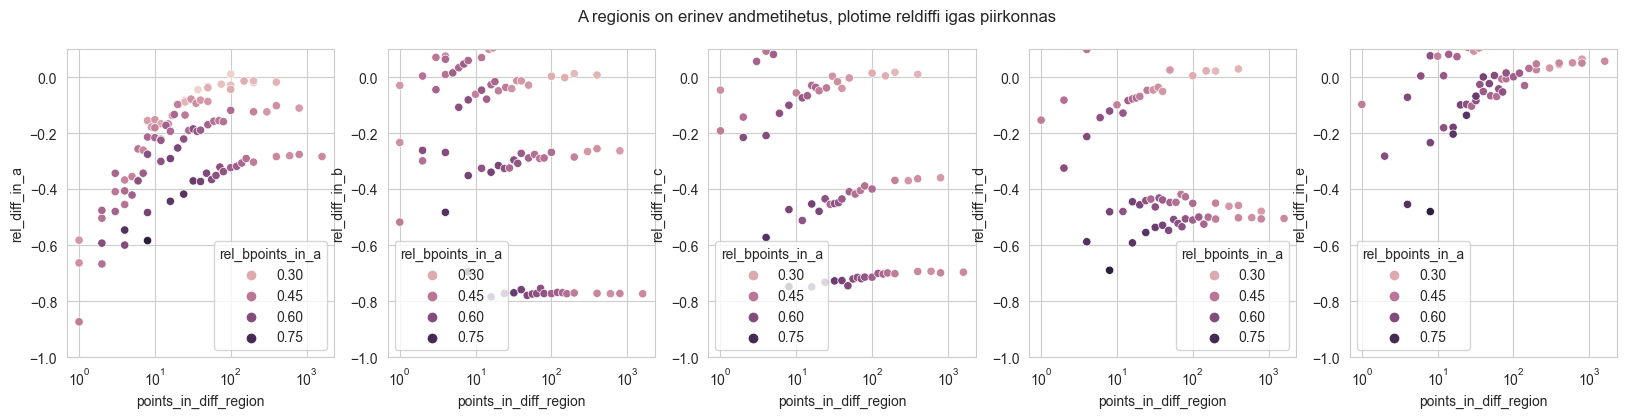

In [34]:
test_df = df[(df.region=="A")&(df.points_in_diff_region!=0)] #&(df.multiplier==2)
fig, ax = plt.subplots(1,5, figsize=(20, 4))

[a.set_xscale( "log") for a in ax]
[a.set_ylim(-1, 0.1) for a in ax]
# plt.legend(loc='lower right')
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_a",hue="rel_bpoints_in_a" ,ax=ax[0])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_b",hue="rel_bpoints_in_a", ax=ax[1])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_c",hue="rel_bpoints_in_a", ax=ax[2])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_d",hue="rel_bpoints_in_a", ax=ax[3])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_e",hue="rel_bpoints_in_a", ax=ax[4])
plt.suptitle("A regionis on erinev andmetihetus, plotime reldiffi igas piirkonnas")
plt.show()

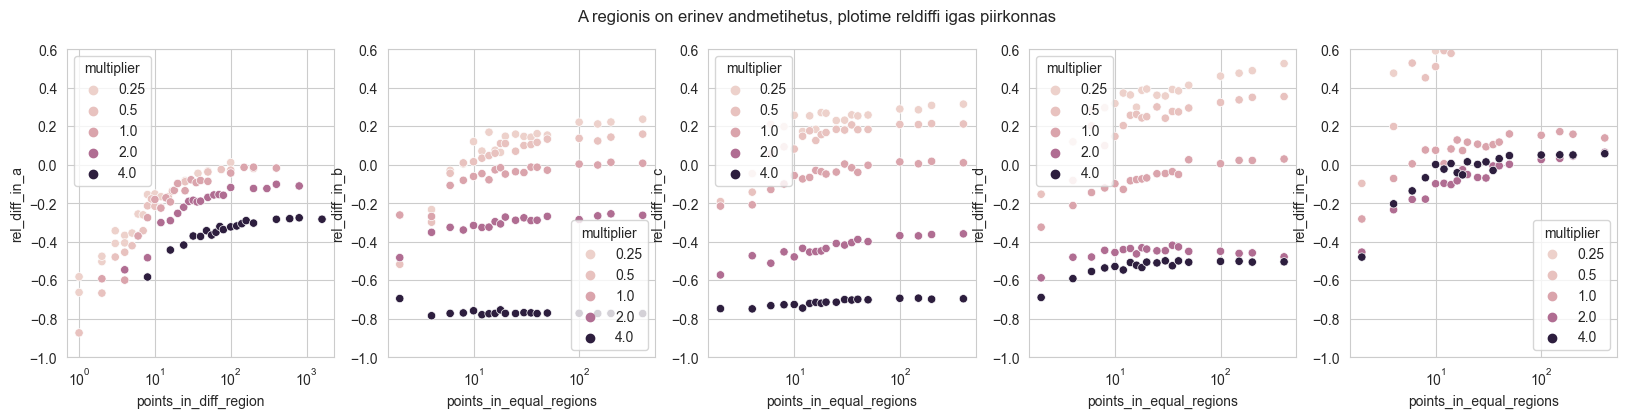

In [43]:
test_df = df[(df.region=="A")&(df.points_in_diff_region!=0)] #&(df.multiplier==2)
fig, ax = plt.subplots(1,5, figsize=(20, 4))

[a.set_xscale( "log") for a in ax]
[a.set_ylim(-1, 0.6) for a in ax]
# plt.legend(loc='lower right')
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_a",hue="multiplier" ,ax=ax[0])
sns.scatterplot(data = test_df, x="points_in_equal_regions",y="rel_diff_in_b",hue="multiplier", ax=ax[1])
sns.scatterplot(data = test_df, x="points_in_equal_regions",y="rel_diff_in_c",hue="multiplier", ax=ax[2])
sns.scatterplot(data = test_df, x="points_in_equal_regions",y="rel_diff_in_d",hue="multiplier", ax=ax[3])
sns.scatterplot(data = test_df, x="points_in_equal_regions",y="rel_diff_in_e",hue="multiplier", ax=ax[4])
plt.suptitle("A regionis on erinev andmetihetus, plotime reldiffi igas piirkonnas")
plt.show()

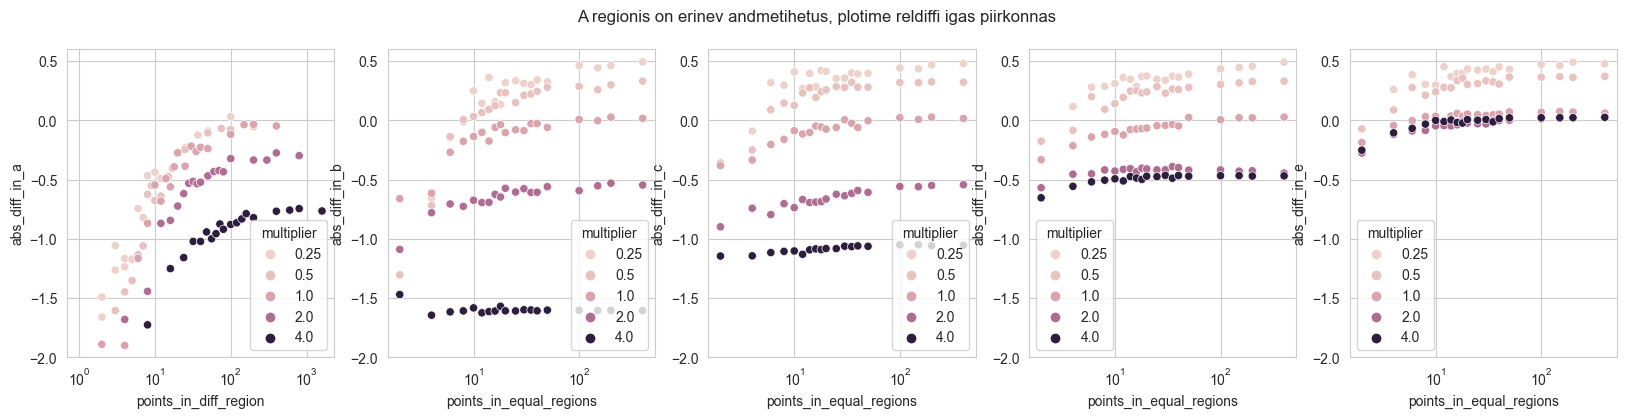

In [45]:
test_df = df[(df.region=="A")&(df.points_in_diff_region!=0)] #&(df.multiplier==2)
fig, ax = plt.subplots(1,5, figsize=(20, 4))

[a.set_xscale( "log") for a in ax]
[a.set_ylim(-2, 0.6) for a in ax]
# plt.legend(loc='lower right')
sns.scatterplot(data = test_df, x="points_in_diff_region",y="abs_diff_in_a",hue="multiplier" ,ax=ax[0])
sns.scatterplot(data = test_df, x="points_in_equal_regions",y="abs_diff_in_b",hue="multiplier", ax=ax[1])
sns.scatterplot(data = test_df, x="points_in_equal_regions",y="abs_diff_in_c",hue="multiplier", ax=ax[2])
sns.scatterplot(data = test_df, x="points_in_equal_regions",y="abs_diff_in_d",hue="multiplier", ax=ax[3])
sns.scatterplot(data = test_df, x="points_in_equal_regions",y="abs_diff_in_e",hue="multiplier", ax=ax[4])
plt.suptitle("A regionis on erinev andmetihetus, plotime reldiffi igas piirkonnas")
plt.show()

### region B

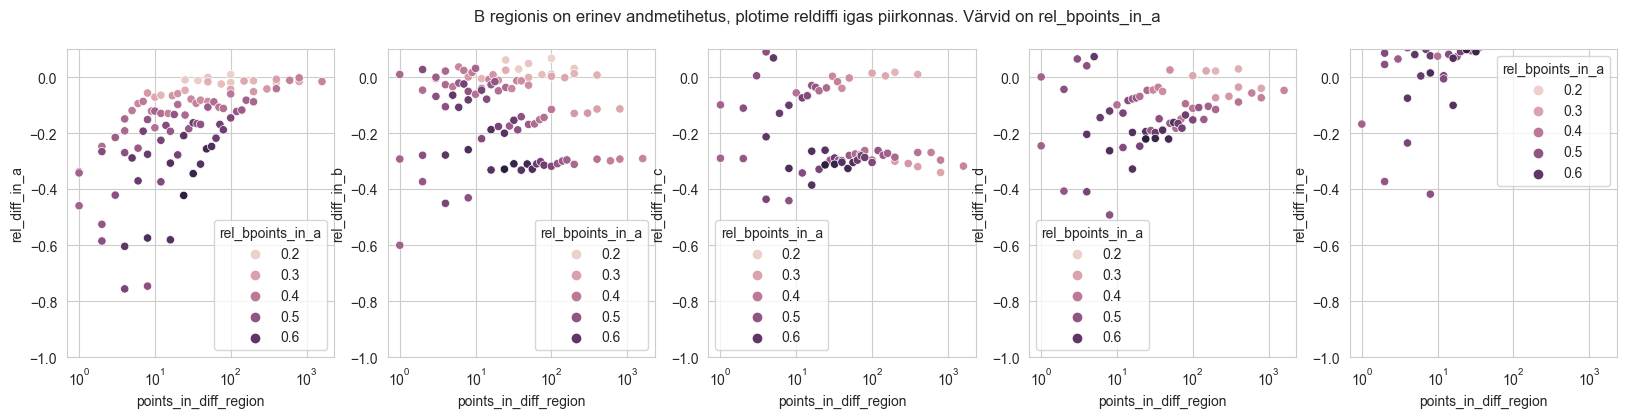

In [35]:
test_df = df[(df.region=="B")&(df.points_in_diff_region!=0)]
fig, ax = plt.subplots(1,5, figsize=(20, 4))

[a.set_xscale( "log") for a in ax]
[a.set_ylim(-1, 0.1) for a in ax]
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_a",hue="rel_bpoints_in_a" ,ax=ax[0])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_b",hue="rel_bpoints_in_a", ax=ax[1])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_c",hue="rel_bpoints_in_a", ax=ax[2])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_d",hue="rel_bpoints_in_a", ax=ax[3])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_e",hue="rel_bpoints_in_a", ax=ax[4])
plt.suptitle("B regionis on erinev andmetihetus, plotime reldiffi igas piirkonnas. Värvid on rel_bpoints_in_a")
plt.show()

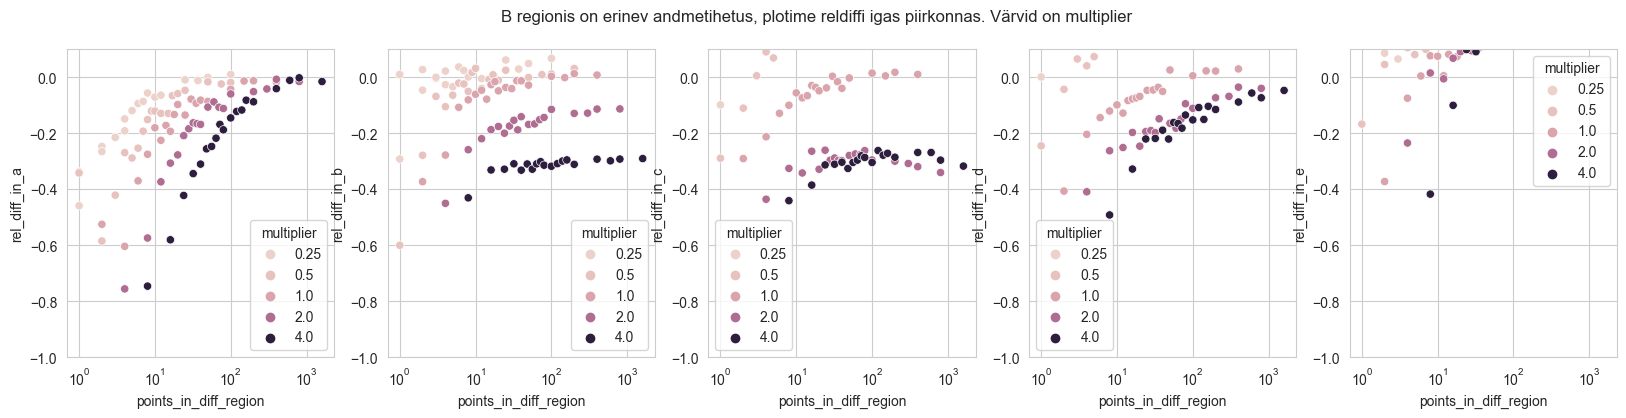

In [40]:
## DIFFERENT ASI 

test_df = df[(df.region=="B")&(df.points_in_diff_region!=0)]
fig, ax = plt.subplots(1,5, figsize=(20, 4))

[a.set_xscale( "log") for a in ax]
[a.set_ylim(-1, 0.1) for a in ax]
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_a",hue="multiplier" ,ax=ax[0])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_b",hue="multiplier", ax=ax[1])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_c",hue="multiplier", ax=ax[2])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_d",hue="multiplier", ax=ax[3])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_e",hue="multiplier", ax=ax[4])
plt.suptitle("B regionis on erinev andmetihetus, plotime reldiffi igas piirkonnas. Värvid on multiplier")
plt.show()

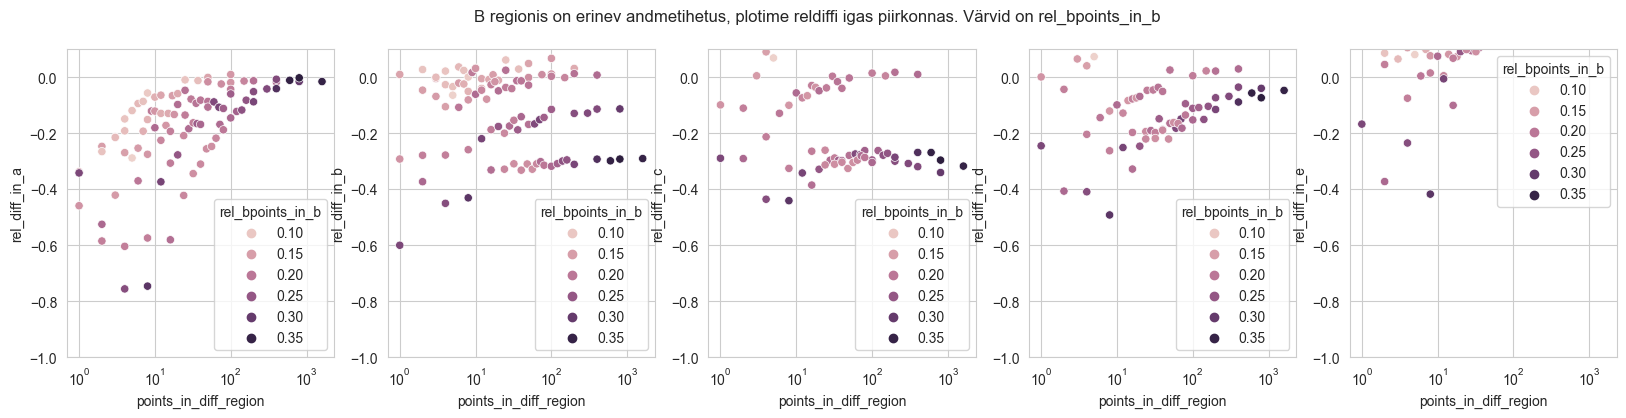

In [36]:
test_df = df[(df.region=="B")&(df.points_in_diff_region!=0)]
fig, ax = plt.subplots(1,5, figsize=(20, 4))

[a.set_xscale( "log") for a in ax]
[a.set_ylim(-1, 0.1) for a in ax]
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_a",hue="rel_bpoints_in_b" ,ax=ax[0])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_b",hue="rel_bpoints_in_b", ax=ax[1])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_c",hue="rel_bpoints_in_b", ax=ax[2])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_d",hue="rel_bpoints_in_b", ax=ax[3])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_e",hue="rel_bpoints_in_b", ax=ax[4])
plt.suptitle("B regionis on erinev andmetihetus, plotime reldiffi igas piirkonnas. Värvid on rel_bpoints_in_b")
plt.show()

### region E

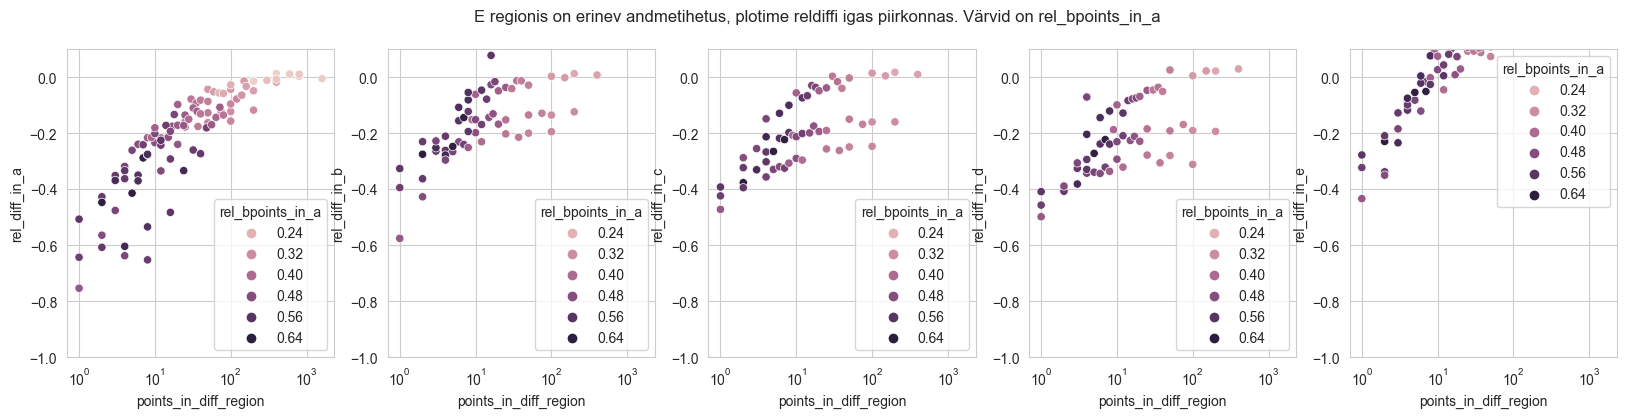

In [37]:
test_df = df[(df.region=="E")&(df.points_in_diff_region!=0)]
fig, ax = plt.subplots(1,5, figsize=(20, 4))

[a.set_xscale( "log") for a in ax]
[a.set_ylim(-1, 0.1) for a in ax]
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_a",hue="rel_bpoints_in_a" ,ax=ax[0])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_b",hue="rel_bpoints_in_a", ax=ax[1])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_c",hue="rel_bpoints_in_a", ax=ax[2])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_d",hue="rel_bpoints_in_a", ax=ax[3])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_e",hue="rel_bpoints_in_a", ax=ax[4])
plt.suptitle("E regionis on erinev andmetihetus, plotime reldiffi igas piirkonnas. Värvid on rel_bpoints_in_a")
plt.show()

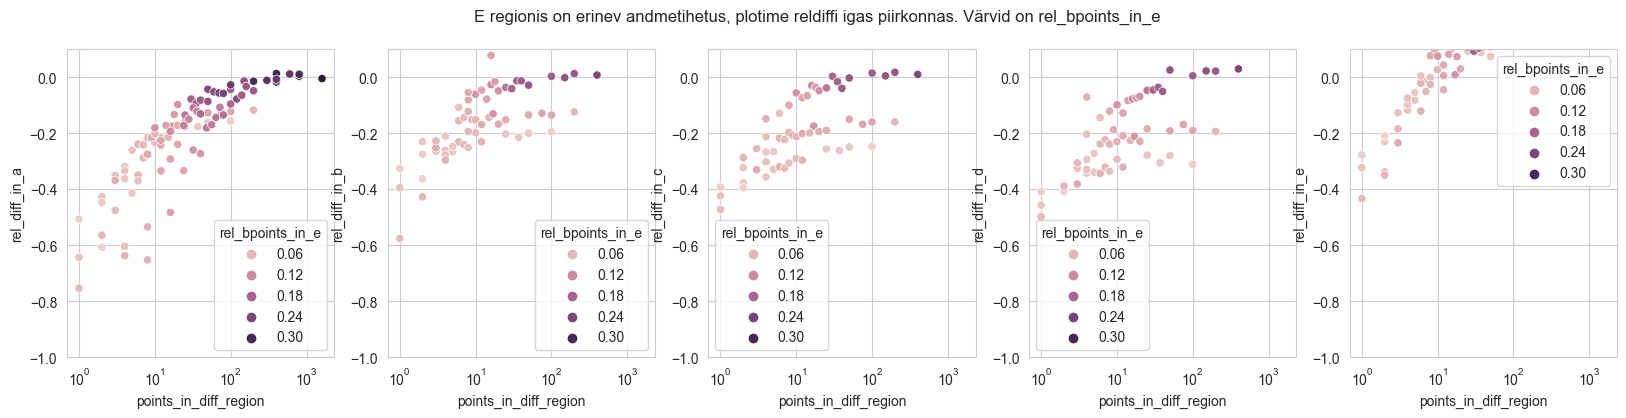

In [38]:
test_df = df[(df.region=="E")&(df.points_in_diff_region!=0)]
fig, ax = plt.subplots(1,5, figsize=(20, 4))

[a.set_xscale( "log") for a in ax]
[a.set_ylim(-1, 0.1) for a in ax]
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_a",hue="rel_bpoints_in_e" ,ax=ax[0])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_b",hue="rel_bpoints_in_e", ax=ax[1])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_c",hue="rel_bpoints_in_e", ax=ax[2])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_d",hue="rel_bpoints_in_e", ax=ax[3])
sns.scatterplot(data = test_df, x="points_in_diff_region",y="rel_diff_in_e",hue="rel_bpoints_in_e", ax=ax[4])
plt.suptitle("E regionis on erinev andmetihetus, plotime reldiffi igas piirkonnas. Värvid on rel_bpoints_in_e")
plt.show()

<AxesSubplot: >

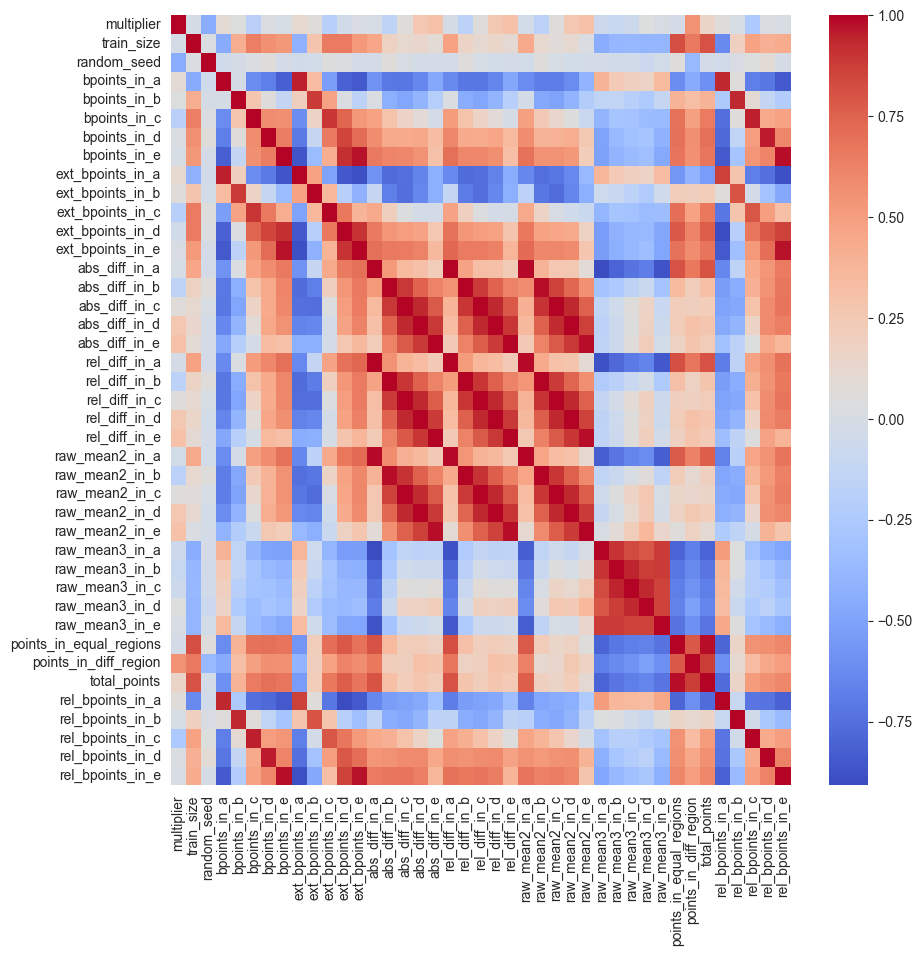

In [39]:
correl_df = df.copy()
correl_df = correl_df[correl_df.points_in_diff_region!=0]

correl_df["points_in_diff_region"] = np.log10(correl_df["points_in_diff_region"])
correl_df["points_in_equal_regions"] = np.log10(correl_df["points_in_equal_regions"])
correl_df["total_points"] = np.log10(correl_df["total_points"])
plt.figure(figsize=(10,10))
sns.heatmap(correl_df.corr(numeric_only=True),cmap="coolwarm", )

# regressioon

In [54]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [56]:
ridge_df = df.copy()
ridge_df = ridge_df[ridge_df.points_in_diff_region != 0]
ridge_df["log_diff_region"] = np.log(ridge_df["points_in_diff_region"])
ridge_df["diff_region_m1"] = ridge_df["points_in_diff_region"] ** (-1)
ridge_df["diff_region_m2"] = ridge_df["points_in_diff_region"] ** (-2)
ridge_df["diff_region_m3"] = ridge_df["points_in_diff_region"] ** (-3)

# 'ext_bpoints_in_a', 'ext_bpoints_in_b', 'ext_bpoints_in_c','ext_bpoints_in_d', 'ext_bpoints_in_e',
# 'points_in_equal_regions', 'points_in_diff_region', 'total_points',


#              'abs_diff_in_a', 'abs_diff_in_b', 'abs_diff_in_c', 'abs_diff_in_d', 'abs_diff_in_e',
#              'rel_diff_in_a', 'rel_diff_in_b', 'rel_diff_in_c', 'rel_diff_in_d', 'rel_diff_in_e',
ridge_df = ridge_df[['region', 'multiplier', 'train_size', "log_diff_region", "points_in_diff_region", "points_in_equal_regions",
                     "diff_region_m1", "diff_region_m2", "diff_region_m3",

              'bpoints_in_a', 'bpoints_in_b', 'bpoints_in_c', 'bpoints_in_d', 'bpoints_in_e',
              "rel_diff_in_a"]]
ohe = OneHotEncoder()
ohetud_region = ohe.fit_transform(ridge_df[["region"]])
ridge_df = pd.concat([ridge_df, pd.DataFrame(ohetud_region.toarray(), columns=ohe.categories_)], axis=1)
ridge_df.drop(columns=["region"], inplace=True)

ridge_df.dropna(inplace=True)
ridge_df.head()
X = ridge_df.drop(columns=["rel_diff_in_a"])
y = ridge_df["rel_diff_in_a"]
scaler = StandardScaler()
y_scaler = StandardScaler()
X = scaler.fit_transform(X)
#y = y_scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


c:\Users\troosma\Documents\Ylikool\6. semester\Bakatöö\bakatoo\env\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\troosma\Documents\Ylikool\6. semester\Bakatöö\bakatoo\env\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


In [62]:
clf = Lasso(alpha=0.05)
clf.fit(X_train, y_train)
mean_squared_error(y_test, clf.predict(X_test))

0.02166487108160689

In [63]:
for n, c in zip(ridge_df.columns, clf.coef_):
    print(f"{n}: {c}")

multiplier: -0.0
train_size: 0.0
log_diff_region: 0.023710279263284655
points_in_diff_region: 0.0
points_in_equal_regions: 0.0
diff_region_m1: -0.014449899604593282
diff_region_m2: -0.0
diff_region_m3: -0.0
bpoints_in_a: -0.0
bpoints_in_b: 0.0
bpoints_in_c: 0.0
bpoints_in_d: 0.0042207720532322305
bpoints_in_e: 0.045618697475672605
rel_diff_in_a: -0.0
('A',): 0.0
('B',): 0.0
('C',): -0.0
('D',): -0.0
